# Kaggle Project: Suicide Rate Overview (1985-2016)

- 27820 observations with 12 columns
- About the file: country, year, sex, age group, count of suicides, population, suicide rate, country-year composite key, HDI for year, gdp_for_year, gdp_per_capita, generation (based on age grouping average).

***

## Data Cleaning

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('master.csv')

In [5]:
# 27820 observations with 12 columns 
data.shape

(27820, 12)

In [6]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [7]:
# To inspect the column names for any anomalies
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [9]:
# Rename the column names. The inplace argument is set to True to rename it on the fly.
data.rename(columns={'country-year': 'country_year',' gdp_for_year ($) ': 'gdp_for_year ($)'}, inplace=True)
# To check again
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country_year', 'HDI for year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [10]:
# Inspect the summary information
# Column 'HDI for year' has missing values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country_year          27820 non-null object
HDI for year          8364 non-null float64
gdp_for_year ($)      27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [24]:
# Percentage of non-missing values for column 'HDI for year'
import math
a = (8364/27820)*100
print('The percentage of non-missing values for column HDI for year is {:.3f}%'.format(a))

The percentage of non-missing values for column HDI for year is 30.065%


In [32]:
# Since the percentage is too low, the column is dropped
data = data.drop(['HDI for year'], axis=1)
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country_year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [27]:
# Value count for each columns
data['country'].value_counts(dropna=False)

Mauritius                 382
Austria                   382
Netherlands               382
Iceland                   382
Argentina                 372
Mexico                    372
United Kingdom            372
Chile                     372
Ecuador                   372
Colombia                  372
Israel                    372
Spain                     372
Japan                     372
Italy                     372
Republic of Korea         372
Greece                    372
Malta                     372
Singapore                 372
Brazil                    372
Puerto Rico               372
Belgium                   372
Luxembourg                372
United States             372
France                    360
Australia                 360
Guatemala                 360
Ireland                   360
Norway                    360
Costa Rica                360
Bulgaria                  360
                         ... 
Bahrain                   252
Estonia                   252
Switzerlan

In [39]:
# 32 Unique countries
len(data.year.unique())

32

In [28]:
data['year'].value_counts(dropna=False)

2009    1068
2001    1056
2010    1056
2007    1032
2011    1032
2002    1032
2003    1032
2000    1032
2006    1020
2008    1020
2005    1008
2004    1008
1999     996
2012     972
2013     960
1998     948
2014     936
1995     936
1996     924
1997     924
1994     816
1992     780
1993     780
1990     768
1991     768
2015     744
1987     648
1989     624
1988     588
1986     576
1985     576
2016     160
Name: year, dtype: int64

In [29]:
# Equal no of males and females
data['sex'].value_counts(dropna=False)

female    13910
male      13910
Name: sex, dtype: int64

In [30]:
# 6 age groups
data['age'].value_counts(dropna=False)

35-54 years    4642
15-24 years    4642
25-34 years    4642
55-74 years    4642
75+ years      4642
5-14 years     4610
Name: age, dtype: int64

In [54]:
data['age'].replace('5-14 years', '05-14 years', inplace=True)

In [55]:
data['generation'].value_counts(dropna=False)

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [56]:
data.describe()

,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,242.574407,1.844794e+06,12.816097,16866.464414
std,902.047917,3.911779e+06,18.961511,18887.576472
min,0.000000,2.780000e+02,0.000000,251.000000
25%,3.000000,9.749850e+04,0.920000,3447.000000
50%,25.000000,4.301500e+05,5.990000,9372.000000
75%,131.000000,1.486143e+06,16.620000,24874.000000
max,22338.000000,4.380521e+07,224.970000,126352.000000


In [62]:
def decade_mapping(years):
    if 1987<= years <= 1996:
        return "1987-1996"
    elif 1997<= years <= 2006:
        return "1997-2006"
    else:
        return "2007-2016"
data.year = data.year.apply(decade_mapping)

TypeError: '<=' not supported between instances of 'int' and 'str'

In [65]:
data1 = data.drop(['population','suicides_no','gdp_per_capita ($)'], axis=1)
data1.groupby(["year","sex"]).sum().reset_index()

,year,sex,suicides/100k pop
0,1987-1996,female,23483.82
1,1987-1996,male,81376.54
2,1997-2006,female,27593.97
3,1997-2006,male,108280.25
4,2007-2016,female,23936.98
5,2007-2016,male,91872.27


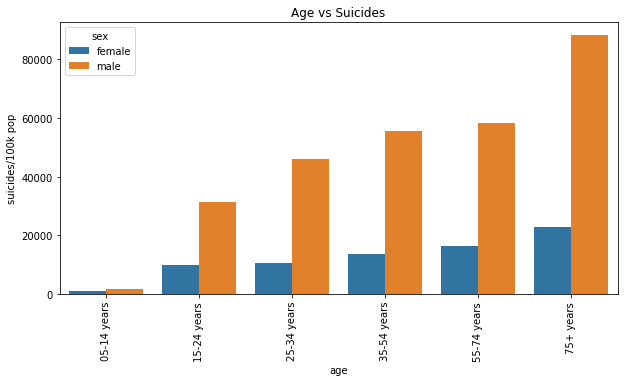

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(x = "age", y = "suicides/100k pop", hue = "sex",data = data.groupby(["age","sex"]).sum().reset_index()).set_title("Age vs Suicides")
plt.xticks(rotation = 90)
plt.show()

- Male have significantly higher suicide rates than female.
- Irrespective of gender, we can see that suicide rates increases as the age increases. 

In [67]:
country_sucides = data1.groupby("country").sum().reset_index()
country_sucides.head()

,country,suicides/100k pop
0,Albania,924.76
1,Antigua and Barbuda,179.14
2,Argentina,3894.59
3,Armenia,976.21
4,Aruba,1596.52


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

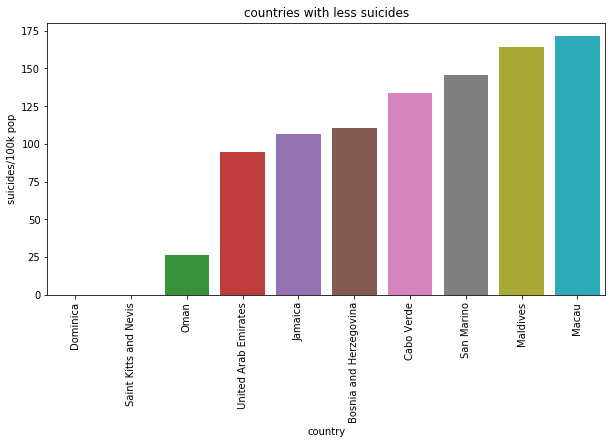

In [68]:
# Top 10 countries with the least suicides
plt.figure(figsize=(10,5))
best_10 = country_sucides.sort_values(by = "suicides/100k pop",ascending= True)[:10]
sns.barplot(x = "country", y = "suicides/100k pop", data = best_10).set_title("countries with less suicides")
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

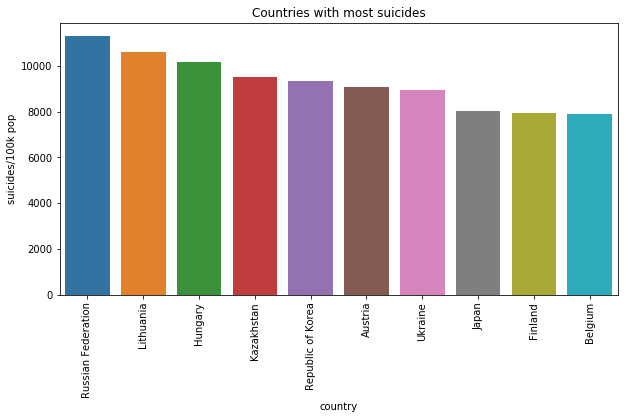

In [69]:
# Top 10 countries with the most suicide
plt.figure(figsize=(10,5))
best_10 = country_sucides.sort_values(by = "suicides/100k pop",ascending= False)[:10]
sns.barplot(x = "country", y = "suicides/100k pop", data = best_10).set_title("Countries with most suicides")
plt.xticks(rotation = 90)

**Which countries has the most/least suicides in the recent decade?**

In [70]:
recent = data1[data1.year =="2007-2016"].groupby("country").sum().reset_index()
recent.head()

,country,suicides/100k pop
0,Albania,178.56
1,Antigua and Barbuda,23.60
2,Argentina,1294.98
3,Armenia,378.16
4,Aruba,327.93


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

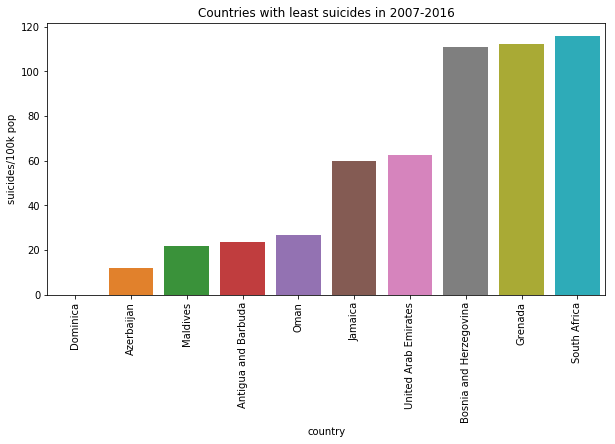

In [72]:
plt.figure(figsize=(10,5))
recent_best_10 = recent.sort_values(by = "suicides/100k pop")[:10]
sns.barplot(x = "country", y = "suicides/100k pop", data = recent_best_10).set_title("Countries with least suicides in 2007-2016")
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

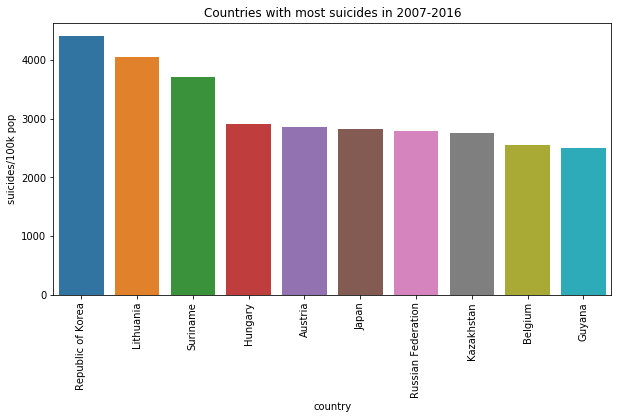

In [73]:
plt.figure(figsize=(10,5))
recent_bad_10 = recent.sort_values(by = "suicides/100k pop",ascending=False)[:10]
sns.barplot(x = "country", y = "suicides/100k pop", data = recent_bad_10).set_title("Countries with most suicides in 2007-2016")
plt.xticks(rotation = 90)

DANGER ZONE Nations vs Safe Zone Nations

- **DANGER ZONE** Nations are those nations where suicides are at **increasing rate for 3 successive decades**, then they are classified to DANGER ZONE NATIONS
- Safe Zone Nations are those nations where suicides are at decreasing rate for 3 successive decades, then they are classified to Safe ZONE NATIONS

With this analysis,
we can understand whether GOVT taking any initiatives for decreasing suicide rate.
Why these specfic Nations have increasing Suicide rate?

In [75]:
zone_assess = data1.groupby(["country","year"]).sum().reset_index()
zone_assess.head()

,country,year,suicides/100k pop
0,Albania,1987-1996,264.62
1,Albania,1997-2006,481.58
2,Albania,2007-2016,178.56
3,Antigua and Barbuda,1987-1996,32.24
4,Antigua and Barbuda,1997-2006,123.30


In [76]:
# Countries having data of three decades
three_gen = zone_assess.country.value_counts().reset_index(name = "count")
three_gen.columns = ["country", "counts"]
three_gen_countries = three_gen[three_gen.counts == 3].country.tolist()

In [77]:
nations = three_gen_countries
years = zone_assess.year.unique()
green_zones = []
danger_zones = []
for country in nations:
    s_year1 = float(zone_assess[(zone_assess.country == country) & (zone_assess.year == "1987-1996")]["suicides/100k pop"])
    s_year2 = float(zone_assess[(zone_assess.country == country) & (zone_assess.year == "1997-2006")]["suicides/100k pop"])
    s_year3 = float(zone_assess[(zone_assess.country == country) & (zone_assess.year == "2007-2016")]["suicides/100k pop"])
    if s_year1 <= s_year2 <= s_year3:
        danger_zones.append(country)
    if s_year1 >= s_year2 >= s_year3:
        green_zones.append(country)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

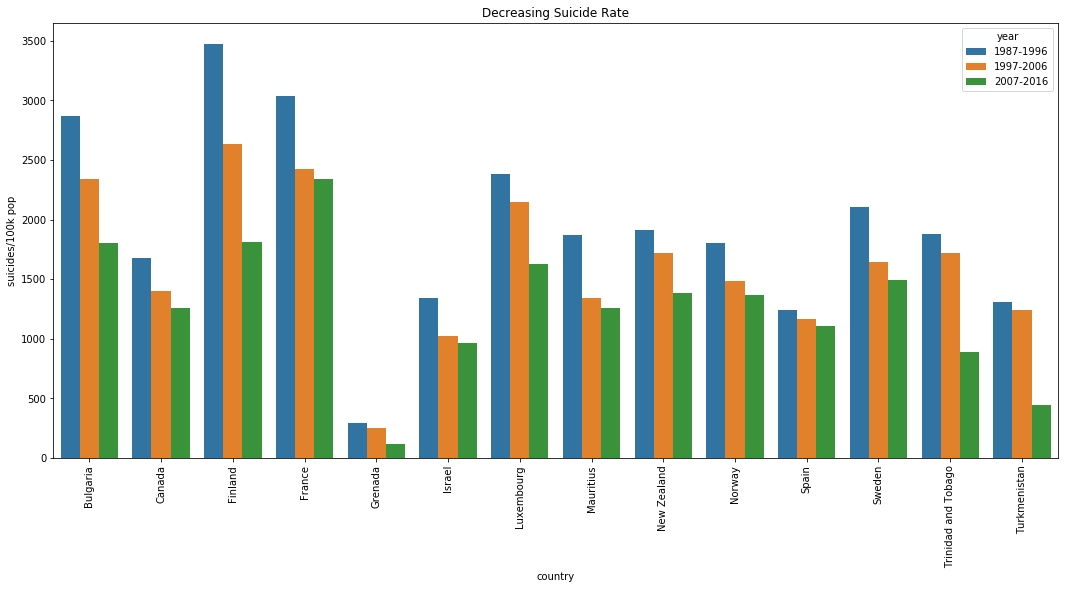

In [78]:
# Safety zone
plt.figure(figsize=(18,8))
sns.barplot(x = "country", y = "suicides/100k pop", hue = "year",data = zone_assess[zone_assess.country.isin(green_zones)]).set_title("Decreasing Suicide Rate")
plt.xticks(rotation = 90)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

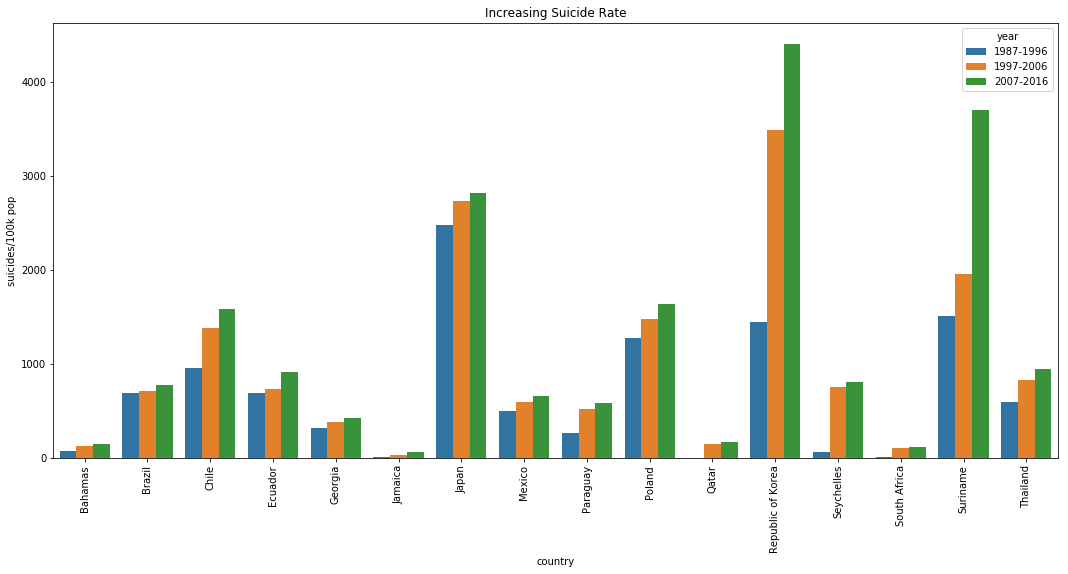

In [79]:
# DANGER ZONE
plt.figure(figsize=(18,8))
sns.barplot(x = "country", y = "suicides/100k pop", hue = "year",data = zone_assess[zone_assess.country.isin(danger_zones)]).set_title("Increasing Suicide Rate")
plt.xticks(rotation = 90)

***

# References

References
United Nations Development Program. (2018). Human development index (HDI). Retrieved from http://hdr.undp.org/en/indicators/137506

World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. Retrieved from http://databank.worldbank.org/data/source/world-development-indicators#

[Szamil]. (2017). Suicide in the Twenty-First Century [dataset]. Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook

World Health Organization. (2018). Suicide prevention. Retrieved from http://www.who.int/mental_health/suicide-prevention/en/